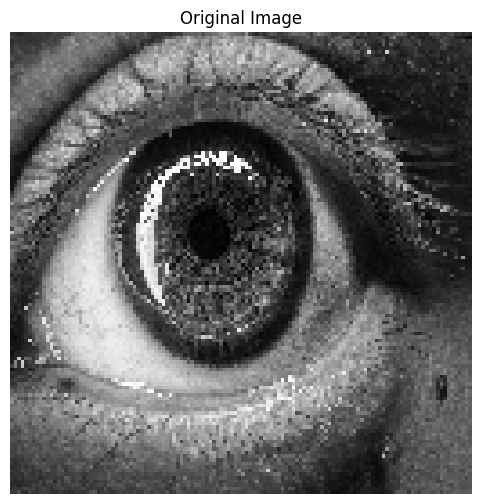

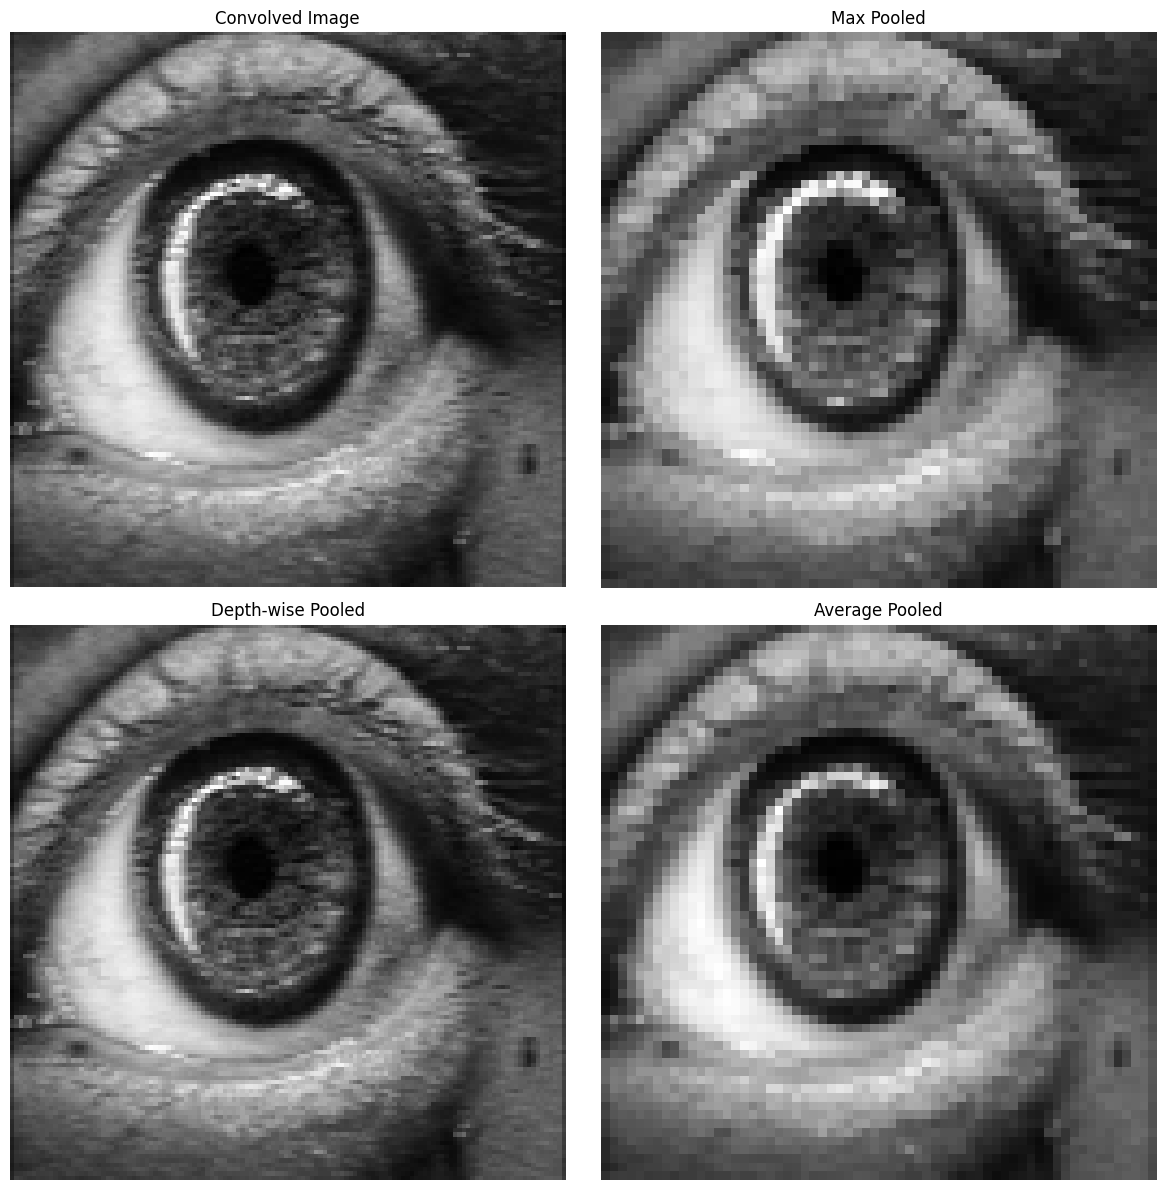

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image URL from Google (or any direct link)
image_url = 'https://images.pexels.com/photos/13477136/pexels-photo-13477136.jpeg'  # Replace with your image URL

# Fetch the image from the URL
response = requests.get(image_url)
img = load_img(BytesIO(response.content), target_size=(128, 128))  # Resize to (128, 128) for simplicity
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]

# Display the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(img_array)
plt.axis('off')
plt.show()

# Add batch dimension for TensorFlow
img_tensor = tf.expand_dims(img_array, axis=0)

# Define a convolutional kernel (3x3 for each RGB channel)
conv_kernel = np.array([[[[1, 0, -1]], [[1, 0, -1]], [[1, 0, -1]]]], dtype=np.float32)

# Apply convolution
conv_layer = tf.nn.conv2d(img_tensor, filters=tf.constant(conv_kernel), strides=[1, 1, 1, 1], padding='SAME')

# Max pooling
max_pooled = tf.nn.max_pool2d(conv_layer, ksize=2, strides=2, padding='SAME')

# Depth-wise pooling
depthwise_pooled = tf.reduce_max(conv_layer, axis=-1, keepdims=True)

# Average pooling
avg_pooled = tf.nn.avg_pool2d(conv_layer, ksize=2, strides=2, padding='SAME')

# Visualization
plt.figure(figsize=(12, 12))
titles = ['Convolved Image', 'Max Pooled', 'Depth-wise Pooled', 'Average Pooled']
images = [conv_layer[0, :, :, 0].numpy(), max_pooled[0, :, :, 0].numpy(), depthwise_pooled[0, :, :, 0].numpy(), avg_pooled[0, :, :, 0].numpy()]

for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(2, 2, i + 1)
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7723 - loss: 0.6653 - val_accuracy: 0.8351 - val_loss: 0.4598
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8584 - loss: 0.4014 - val_accuracy: 0.8648 - val_loss: 0.3896
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8716 - loss: 0.3533 - val_accuracy: 0.8573 - val_loss: 0.3983
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8795 - loss: 0.3324 - val_accuracy: 0.8706 - val_loss: 0.3609
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8899 - loss: 0.3057 - val_accuracy: 0.8736 - val_loss: 0.3521
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8956 - loss: 0.2876 - val_accuracy: 0.8748 - val_loss: 0.3463
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9006 - loss: 0.2762 - val_accuracy: 0.8771 - val_loss: 0.3390
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9037 - loss: 0.2652 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7238 - loss: 0.7775 - val_accuracy: 0.8559 - val_loss: 0.3960
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8721 - loss: 0.3521 - val_accuracy: 0.8766 - val_loss: 0.3399
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8873 - loss: 0.3072 - val_accuracy: 0.8879 - val_loss: 0.3079
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9036 - loss: 0.2655 - val_accuracy: 0.8928 - val_loss: 0.2898
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9095 - loss: 0.2444 - val_accuracy: 0.9012 - val_loss: 0.2677
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9187 - loss: 0.2202 - val_accuracy: 0.9103 - val_loss: 0.2539
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9273 - loss: 0.1971 - val_accuracy: 0.9064 - val_loss: 0.2634
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9337 - loss: 0.1826 - val_accuracy: 0.

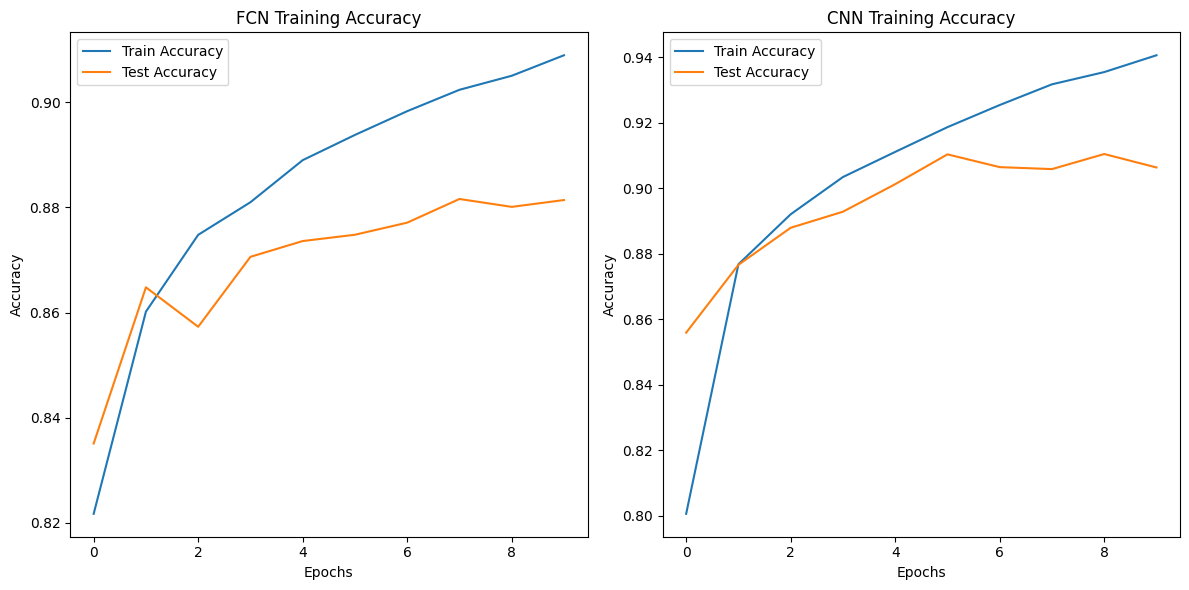

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the data to (28, 28, 1) and normalize it
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# --- Fully Connected Network (FCN) ---
def create_fcn():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))  # Flatten the input
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Convolutional Neural Network (CNN) ---
def create_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Train and Evaluate FCN ---
fcn_model = create_fcn()
fcn_history = fcn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# --- Train and Evaluate CNN ---
cnn_model = create_cnn()
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# --- Compare the results ---
fcn_loss, fcn_acc = fcn_model.evaluate(x_test, y_test)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test, y_test)

print(f"FCN Test Accuracy: {fcn_acc}")
print(f"CNN Test Accuracy: {cnn_acc}")

# --- Plot the Training History ---
plt.figure(figsize=(12, 6))

# Plot FCN training history
plt.subplot(1, 2, 1)
plt.plot(fcn_history.history['accuracy'], label='Train Accuracy')
plt.plot(fcn_history.history['val_accuracy'], label='Test Accuracy')
plt.title('FCN Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot CNN training history
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Test Accuracy')
plt.title('CNN Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))


GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Residual Block definition
def residual_block(x, filters, stride=1, downsample=False):
    shortcut = x

    # First convolutional layer
    x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second convolutional layer
    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Downsample the shortcut if needed (when stride > 1)
    if downsample:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Add the shortcut to the output (skip connection)
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    return x

# ResNet-34 Model
def resnet34(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Initial Convolutional Layer
    x = layers.Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # ResNet Blocks
    # Group 1
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    # Group 2
    x = residual_block(x, 128, stride=2, downsample=True)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    # Group 3
    x = residual_block(x, 256, stride=2, downsample=True)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    # Group 4
    x = residual_block(x, 512, stride=2, downsample=True)
    x = residual_block(x, 512)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = models.Model(inputs, x)
    return model

# Create the ResNet-34 model
model = resnet34(input_shape=(32, 32, 3), num_classes=10)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.3629 - loss: 1.9196 - val_accuracy: 0.4843 - val_loss: 1.4785
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5896 - loss: 1.1684 - val_accuracy: 0.5240 - val_loss: 1.4855
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.6555 - loss: 0.9968 - val_accuracy: 0.4834 - val_loss: 1.6970
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.6844 - loss: 0.9059 - val_accuracy: 0.4458 - val_loss: 1.7784
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5726 - loss: 1.2941 - val_accuracy: 0.6136 - val_loss: 1.0870
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7374 - loss: 0.7587 - val_accuracy: 0.2724 - val_loss: 5.7315
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7482 - loss: 0.7385 - val_accuracy: 0.6490 - val_loss: 1.0622
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
 92/100 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.7109 - loss: 0.7539

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 589ms/step - accuracy: 0.7182 - loss: 0.7357 - val_accuracy: 0.9074 - val_loss: 0.2821
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - accuracy: 0.8946 - loss: 0.2969 - val_accuracy: 0.9128 - val_loss: 0.2695
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - accuracy: 0.9249 - loss: 0.2331 - val_accuracy: 0.9101 - val_loss: 0.2547
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 248ms/step - accuracy: 0.9381 - loss: 0.1887 - val_accuracy: 0.9155 - val_loss: 0.2528
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - accuracy: 0.9615 - loss: 0.1398 - val_accuracy: 0.9183 - val_loss: 0.2646
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 222ms/step - accuracy: 0.9603 - loss: 0.1225 - val_accuracy: 0.8937 - val_loss: 0.2780
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 222ms/step - accuracy: 0.9717 - loss: 0.0961 - val_accuracy: 0.9074 - val_loss: 0.2669
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 222ms/step - accuracy: 0.9775 - loss: 0.0844 - val

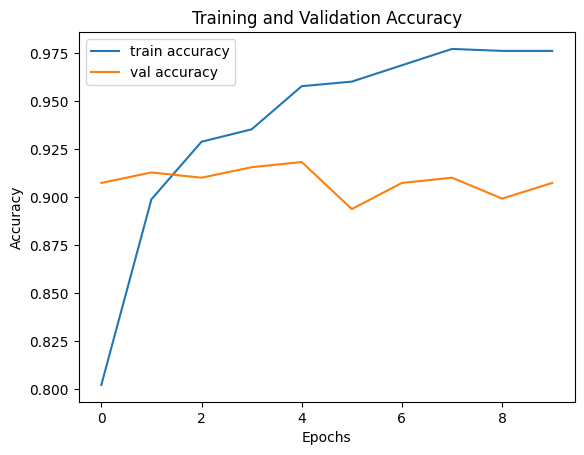

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

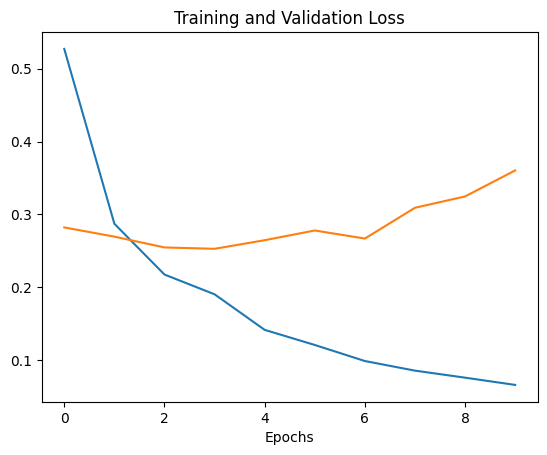

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

# 4.1 Load the tf_flowers dataset and split it
# Load dataset from TensorFlow Datasets (TFDS)
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'])

# Split the dataset into training, validation, and test sets
train_data = dataset[0]
test_data = dataset[2]
validation_data = dataset[1]

# 4.2 Pre-process and resize the images
IMG_SIZE = 299  # Xception model requires 299x299 images

def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize the images to 299x299
    image = tf.keras.applications.xception.preprocess_input(image)  # Preprocess as per Xception model
    return image, label

train_data = train_data.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
validation_data = validation_data.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# 4.3 Create the Keras model using the pre-trained Xception model
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load pre-trained weights from ImageNet
    include_top=False,   # Exclude the top (fully connected) layers
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Freeze the base model layers
base_model.trainable = False

# Build the custom top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 classes in tf_flowers
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',  # since labels are integers
              metrics=['accuracy'])

# 4.4 Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10,  # You can increase the epochs as needed
    steps_per_epoch=100,  # You can adjust this based on dataset size
    validation_steps=50  # You can adjust this based on validation set size
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Accuracy: {test_acc}')

# Report the results: Training and validation accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel